In [127]:
import pandas as pd
import numpy as np
from sklearn import datasets
import random as rand
import matplotlib.pyplot as plt

%matplotlib inline

In [128]:
def save_plot(data: list[list[float]], title:int):
    xs = [c[0] for c in data]
    ys = [c[1] for c in data]
    plt.clf()
    plt.scatter(xs, ys, s=8)
    plt.savefig(f"plots/{title}.png")
    

In [129]:
def write_data(n, d, eps, minpts, data, title):
    # write input file for n points of d dimensions with k clusters
    # data is an list of lists, where each list holds the coordinates of points
    # i indicates what the numbering for the input file should be
    
    with open(f'./input/{title}.in', 'w') as f:
        f.write(f"{n} {d} {eps} {minpts}\n")
        for p in data:
            f.write(f"{' '.join(map(str,p))}\n")

In [130]:
def generate_data(n:int, noise_ratio:float, epsilon: float,  seed:int, input_name_number:int):
    n_noise = int(n * noise_ratio)
    n_non_noise = n - n_noise


    np.random.seed(seed) 
    X_array,y = datasets.make_blobs(n_samples=n_non_noise, centers=3, cluster_std = 1, n_features=2)

    # the functions output numpy ndarrays which can be converted to python lists
    X = [point.tolist() for point in X_array]
    min_x = min(X_array, key = lambda x : x[0] )[0]
    max_x = max(X_array, key = lambda x : x[0] )[0]

    min_y = min(X_array, key = lambda x : x[1] )[1]
    max_y = max(X_array, key = lambda x : x[1] )[1]

    #you need not create all data using sk_learn, for example creating uniform noise is easy to do manually
    noise = []
    for _ in range(n_noise):
        x = np.random.uniform(min_x,max_x)
        y = np.random.uniform(min_y,max_y)
        noise.append([x,y])

    # Two lists of points can be merged as follows. 
    # Useful for example when adding clusters of different sizes or types or for adding noise
    X_comb = X + noise

    #this will write the clustering to file "./input/10.in" with n = #points, dimension 2, eps=0.4 and minpts = 4
    write_data(len(X_comb),2, epsilon,4, X_comb, f"e{epsilon} r{noise_ratio}")
    save_plot(X_comb, f"e{epsilon} r{noise_ratio}")
    return X_comb

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9
1.0
1.1
1.2000000000000002
1.3000000000000003
1.4000000000000001
1.5000000000000002
1.6
1.7000000000000002
1.8000000000000003
1.9000000000000001
2.0
2.1
2.2
2.3000000000000003
2.4000000000000004
2.5000000000000004
2.6
2.7
2.8000000000000003
2.9000000000000004
3.0000000000000004
3.1
3.2
3.3000000000000003
3.4000000000000004
3.5000000000000004
3.6
3.7
3.8000000000000003
3.9000000000000004
4.0
4.1
4.2
4.3
4.3999999999999995
4.5
4.6
4.7
4.8
4.9
0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9
1.0
1.1
1.2000000000000002
1.3000000000000003
1.4000000000000001
1.5000000000000002
1.6
1.7000000000000002
1.8000000000000003
1.9000000000000001
2.0
2.1
2.2
2.3000000000000003
2.4000000000000004
2.5000000000000004
2.6
2.7
2.8000000000000003
2.9000000000000004
3.0000000000000004
3.1
3.2
3.3000000000000003
3.4000000000000004
3.5000000000000004
3.6
3.7
3.8000000000000003
3.9000000000000004
4.0
4.1
4.2
4.3
4.3999999999999

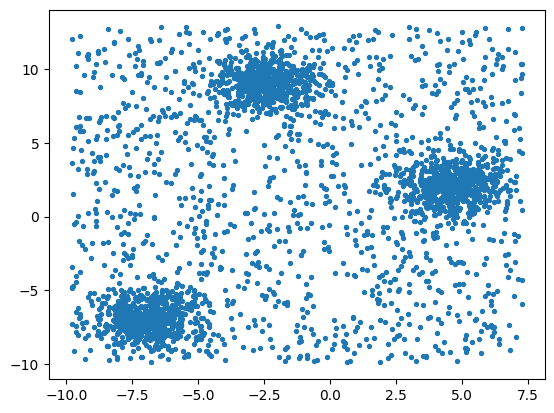

In [134]:
# make_blobs and some other function return a pair containing the output points and other information.
# Check the definitions of various function to see how to obtain the data points
# There are several types of generators that you can experiment with

N = 3000 # total number of pooints
noise_ratio = 0.1 # number of noise points = N * noise_ratio 
SEED = 42

noise_ratios = [0.025, 0.1, 0.4]
epsilons = [0.2, 0.4, 0.6, 0.8, 1, 1.5, 2]
# len(epsilons)
for i, ratio in enumerate(noise_ratios):
    for epsilon in epsilons:
        print(epsilon)
        generate_data(N, ratio, round(epsilon, 1), SEED, 10+i)




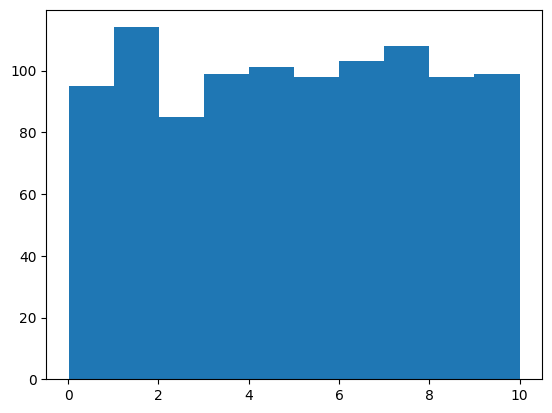

c:\Users\20210882\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\axes\_axes.py:6670: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


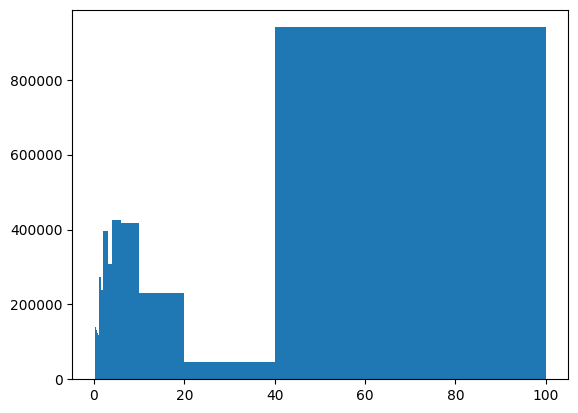

Index(['run', 'name', 'dataset', 'total', 'init', 'find_core_points',
       'compute_cluster_cores', 'assign_border_points', 'remove_noise_points',
       'create_clusters', 'r', 'eps'],
      dtype='object')

total
name         r               
BoxGraph     0.400   0.111657
             0.100   0.119448
             0.025   0.120013
QuadTree     0.400  12.219693
             0.100  15.508629
             0.025  16.574059
Linear Query 0.400  32.166342
             0.100  33.668612
             0.025  36.098192

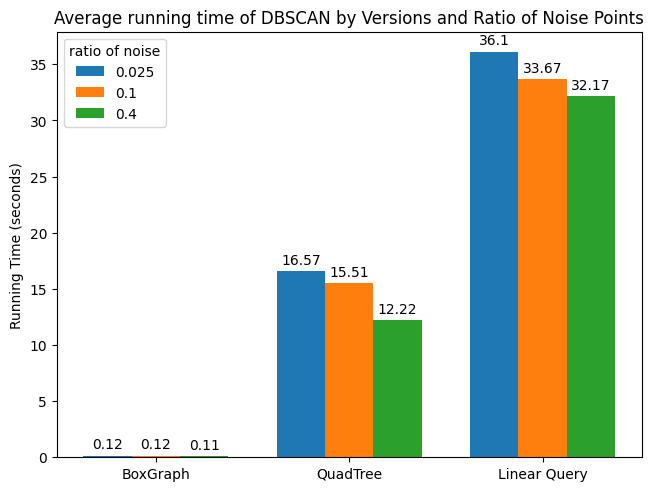

In [20]:
df

,run,name,dataset,total,init,find_core_points,compute_cluster_cores,assign_border_points,remove_noise_points,create_clusters,r,eps
0,0,BoxGraph,e1 r0.025,0.163412,0.016604,0.010753,0.120744,0.001089,NaN,NaN,0.025,1
1,1,BoxGraph,e1 r0.025,0.158138,0.017954,0.011026,0.115386,0.000663,NaN,NaN,0.025,1
2,2,BoxGraph,e1 r0.025,0.150539,0.015161,0.010119,0.111792,0.000585,NaN,NaN,0.025,1
3,3,BoxGraph,e1 r0.025,0.156744,0.016676,0.010632,0.115725,0.000664,NaN,NaN,0.025,1
4,4,BoxGraph,e1 r0.025,0.156784,0.017104,0.010970,0.115032,0.000681,NaN,NaN,0.025,1
...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,Linear Query,e0.6 r0.4,35.997997,0.000087,23.187613,NaN,NaN,1.749569,11.041631,0.4,0.6
311,1,Linear Query,e0.6 r0.4,36.015630,0.000090,23.194616,NaN,NaN,1.753008,11.046447,0.4,0.6
312,2,Linear Query,e0.6 r0.4,36.170254,0.000088,23.210373,NaN,NaN,1.746961,11.067605,0.4,0.6
313,3,Linear Query,e0.6 r0.4,36.049652,0.000095,23.243971,NaN,NaN,1.755750,11.030623,0.4,0.6


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

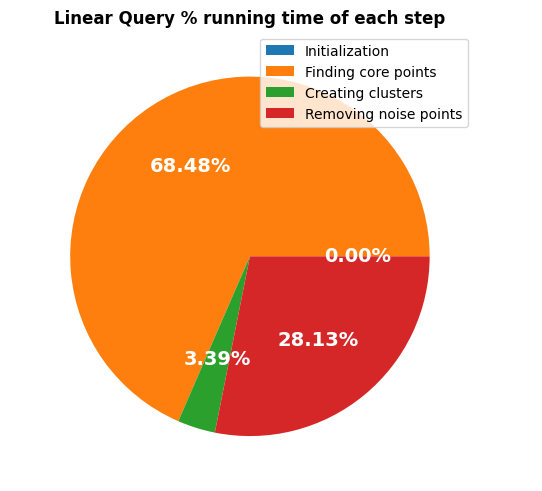

,init,find_core_points,remove_noise_points,create_clusters
eps,,,,
0.2,0.107236,3.681991,0.031297,0.248571
0.4,0.123007,8.364125,0.015253,0.333224
0.6,0.116531,9.965704,0.003644,0.287504
0.8,0.130595,15.400222,0.002042,0.365734
1,0.086221,14.892536,0.001367,0.310942
1.5,0.148087,23.336269,0.000967,0.335715
2,0.141022,24.299501,0.000819,0.352805
